# DSGE Problem Set 3: Perturbation Methods  

# Exercise 1
The third derivative of $F(x(u),u)$  with respect to $u$, evaluated at $u_0$ is
$$
x_{uuu} = -\frac{F_{xxx}x^3_u + 3(F_{xxu}x^2_u + F_{uux}x_u + F_{xu}x_{uu} + F_{xx}x_ux_{uu}) + F_{uuu}}{F_x}
$$

## Exercise 2

In [1]:
import sympy as sy
import numpy as np
from scipy.optimize import fsolve
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy.solvers import solve

In [50]:
# Find the market wage rate

def excess(w, k, params):
    #unpack params 
    [alpha,z, b, t, h] = params
    nd = (((1 - alpha)* z) / w) ** (1 / alpha) * k
    pi = z * k ** alpha * (nd) ** (1 - alpha) - w * nd
    ns = h - (b / (w * (1 + b))) * (w * h + pi - t)
    return nd - ns


In [51]:
def Bnumdiff3(true_fn,y0,x0, params, eps):
    Fn = lambda y,x: true_fn(y,x,params)
    K = Fn(y0, x0)
    F = Fn(y0+eps, x0)
    Q = Fn(y0-eps, x0)       
    L = Fn(y0, x0+eps)
    J = Fn(y0, x0-eps)
    G = Fn(y0+eps, x0+eps)
    P = Fn(y0-eps, x0-eps)
    E = Fn(y0+eps, x0-eps)
    R = Fn(y0-eps, x0+eps)
    B = Fn(y0+2*eps, x0)
    U = Fn(y0-2*eps, x0)
    M = Fn(y0, x0+2*eps)
    I = Fn(y0, x0-2*eps)
    H = Fn(y0+eps, x0+2*eps)
    C = Fn(y0+2*eps, x0+eps)
    A = Fn(y0+2*eps, x0-eps)
    V = Fn(y0-2*eps, x0+eps)
    T = Fn(y0-2*eps, x0-eps)
    S = Fn(y0-eps, x0+2*eps)
    N = Fn(y0-eps, x0-2*eps)
    D = Fn(y0+eps, x0-2*eps)
    
    Fk = (L - J) / (2*eps)
    Fw = (F - Q) / (2*eps)            
    
    Fkk = (L -2* K + J)/(eps**2)
    Fww = (F -2* K + Q)/(eps**2)
    Fkw = (G- E - R+ P ) / (4*eps**2)    
    
    Fwww =(B+2*Q-2*F+2*Q-U) / (2*eps**3)
    Fkkk =(M+2*J+2*J-2*L-I) / (2*eps**3)    
    Fkww = (A-2*J-C+T+2*L-V) / (8*eps)
    Fkkw = (H-2*F-S+D+2*Q-N) / (8*eps)
    # Finite central difference
    return Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk

In [54]:
param_names = ("alpha","z","b","t","h")
params = [.33, 1, 2, .1, 24]

In [68]:
def perturb_fn(k0,true_fn,order,grid_low,grid_high,eps,params=0):

    #  create anonymous function
    f = lambda w: true_fn(w,k0,params)
    w0 = fsolve(f, .5)
    print('Market Clearing Wage: ',np.round(w0,3))

    #  check solution
    check = true_fn(w0,k0, params)
    print ('check --> excess demand: ', check)

    # get derivatives from numerical differentiator
    Fw, Fk, Fww, Fkw, Fkk, Fwww, Fkww, Fkkw, Fkkk = \
        Bnumdiff3(true_fn, w0, k0, params, eps);

    # get coefficients using perturbation formulas
    w1 = - Fk/Fw
    w2 = -(Fww*w1**2 + 2*Fkw*w1 + Fkk)/Fw
    w3 = -(Fwww*w1**3 + 3*(Fkww*w1**2 + Fkkw*w1 + Fkw*w2 + Fww*w2*w1 ) + Fkkk) / Fw
    
    # set up a grid
    nstep = 50
    kgrid = np.linspace(grid_low, grid_high, num=nstep)
    wgrid = np.zeros(nstep)
    w1grid = np.zeros(nstep)
    w2grid = np.zeros(nstep)
    w3grid = np.zeros(nstep)

    #  get solutions at each point on the grid
    for i in range(0, nstep):
        # find exact solutions
        # create anonymous function
        f = lambda w: true_fn(w, kgrid[i],params)
        # use fsolve to find equilibrium wage
        wgrid[i] = fsolve(f, .1)
        # evaluate approximations 
        w1grid[i] = w0 + w1*(kgrid[i] - k0)
        w2grid[i] = w1grid[i] + .5*w2*(kgrid[i] - k0)**2
        w3grid[i] = w2grid[i] + (1/6)*w3*(kgrid[i]-k0)**3

    # plot results
    plt.plot(kgrid, wgrid, 'k-',
             kgrid, w1grid, 'r-',
             kgrid, w2grid, 'b-')
    if order == '3':
        plt.plot(kgrid, w3grid, 'g-')
    plt.legend(['Exact', '1st', '2nd', '3rd'], loc=1)
    plt.title('Exact and Approximate Functions around k_0='+str(k0))
    plt.xlabel('k')
    plt.ylabel('w')
    if order == '3':
        plt.ylim([47.,48.])
        plt.figure()
        plt.plot(xGrid, w1grid - wgrid, label='1st')
        plt.plot(xGrid, w2grid - wgrid, label='2nd')
        plt.plot(xGrid, w3grid - wgrid, label='3rd')
        plt.legend()
        plt.xlabel('x')
        plt.ylabel('Difference')
        plt.title('Deviation from True')
    plt.show()
    


Market Clearing Wage:  [0.627]
check --> excess demand:  [4.97379915e-14]


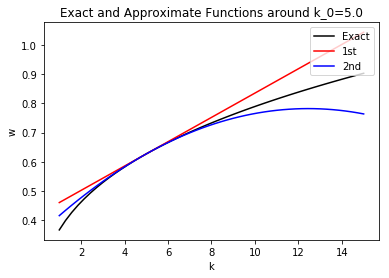

Market Clearing Wage:  [0.789]
check --> excess demand:  [8.8817842e-16]


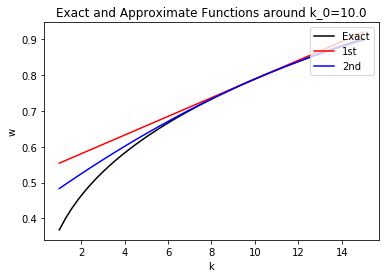

In [57]:
# choose approximation point and perturb excess fn 
k0 = 5.
grid_low = 1
grid_high = 15
# set value for epsilon
eps = .01
perturb_fn(k0, excess,'2',grid_low,grid_high,eps,params)
k0 = 10.
perturb_fn(k0, excess,'2',grid_low,grid_high,eps,params)

## Exercise 3

In [58]:
def Fun(y, x,params=0):
    return (x ** .35 + .9 * x - y) ** -2.5 - .95 * (y **.35 + .9 * y) ** (-2.5)

Market Clearing Wage:  [47.466]
check --> excess demand:  [0.]


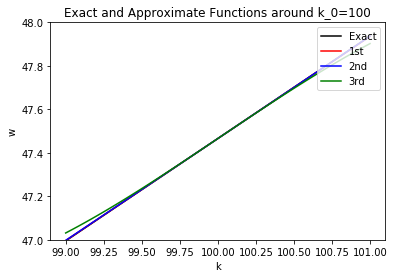

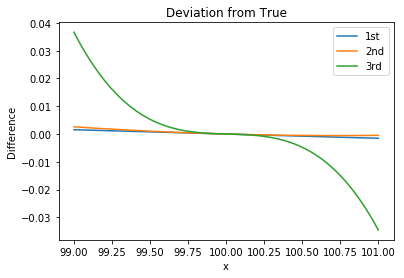

In [70]:
grid_low = 99
grid_high = 101

x0 = 100
eps = 5 

perturb_fn(x0, Fun,'3',grid_low,grid_high,eps,params)




## Problem 4

In [5]:
# u = K_t
# x(u) = K_t+1
# y = x(x(u)) = K_t+2
# F(x,y,u) = Euler eq.

[beta, alpha] = [0.98, .4]
params = [beta, alpha]

kbar = (alpha * beta) ** (1 / (1 - alpha))

# Symbolic
u = sy.Symbol('u')
x = sy.Symbol('x') 
y = sy.Symbol('y')
x_u = sy.Symbol('x_u') 
x_uu = sy.Symbol('x_uu')
y_u = sy.Symbol('y_u')
y_x = sy.Symbol('y_x') 


# Euler Equation
F = (1 / (u ** alpha - x)) - ((beta * alpha * x ** (alpha - 1)) / (x ** alpha - y))

#Take the derivative of (10) with respect to u = Kt
F_u = sy.diff(F, u)
F_y = sy.diff(F,y)
F_x = sy.diff(F,x)

#Evaluating (11) at u = u_bar = kbar and noting that x(ubar) = ubar:
dF = F_y*y_x*x_u + F_x*x_u+F_u
dF_kbar = dF.subs({y_x:x_u, u:kbar,y:kbar, x:kbar})
x_u_kbar = float(solve(dF_kbar)[0])
print('x_u',x_u_kbar)

# second order term
F_uu = sy.diff(F_u, u)
F_yy = sy.diff(F_y,y)
F_yx = sy.diff(F_y,x)
F_yu = sy.diff(F_y,u)
F_xx = sy.diff(F_x,x)
F_xu = sy.diff(F_x,u)


ddF = F_yy*x_u**4 + 2*F_yx*x_u**3 + 2*F_yu *x_u**2 + F_xx*x_u**2 + \
2*F_xu* x_u + F_uu + (F_y*x_u**2 + F_y* x_u + F_x)*x_uu


ddF_kbar = ddF.subs({y_x:x_u,u:kbar,y:kbar,x:kbar,x_u:x_u_kbar})


x_uu_kbar = float(solve(ddF_kbar)[0])
print('x_uu',x_uu_kbar)

#Policy functions:
def analytic(k,params):
    [beta, alpha] = params
    return alpha * beta * (k ** alpha)

def linear(k, kbar, x_u):
    return kbar +  x_u * ((k - kbar)) 

def quadratic(k, kbar, x_u, x_uu):
    return kbar + x_u * (k - kbar) + 0.5 * x_uu * (k - kbar) ** 2 

x_u 0.4000000000000008
x_uu -1.143056760731871


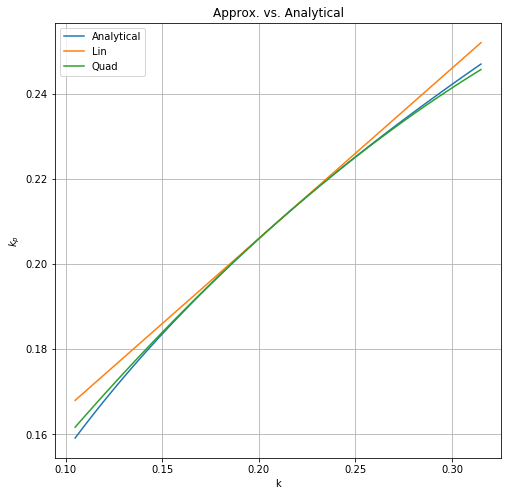

In [6]:
# Create Capital Grid
kGrid = np.linspace(0.5 * kbar, 1.5 * kbar, 50)

# Plot policy functions
fig = plt.figure(figsize=(8, 8))
plt.plot(kGrid, analytic(kGrid,params), label='Analytical')
plt.plot(kGrid, linear(kGrid, kbar, x_u_kbar), label='Lin')
plt.plot(kGrid, quadratic(kGrid, kbar, x_u_kbar, x_uu_kbar), label='Quad')
plt.xlabel('k')
plt.ylabel('$k_p$')
plt.grid()
plt.title('Approx. vs. Analytical')
plt.legend()
plt.show()